## 2) 홈 경기일 때 기준 관객 수(원정 관중 포함) (각 팀별 막대그래프로 값을 비교)
=> 최근 3년 간 어떤 구단이 가장 인기가 있는가?(관중 규모가 가장 큰가)
* 데이터 가공 
1. 관중수 쉼표 없애고 숫자로 형변환
2. 홈 구장 별로 정렬.
3. 빈데이터 딕셔너리 만들어서 2021-23 시즌 {홈구단 : 일평균 총 관중 수} 입력 -> 값이 0인 경우가 있어서 그 경우를 제외했더니 각 구단별 경기 수가 달라져서 일평균 사용.
4. 빈데이터 딕셔너리2 만들어서 2021-23 시즌 {야구장 : 일평균 총 관중 수} 입력

* 그래프1 : 
1.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
%precision 3

'%.3f'

In [142]:
# 데이터에서 필요한 열만 읽어서 데이터 프레임으로 만드는 함수.
def csv_reader(filename):
    df = pd.read_csv(filename, usecols= ['날짜', '홈', '방문', '구장', '관중수'])
    return df
    
# 쉼표 제거 후 int로 변경.
def str_to_int(df, col) :
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)
    return df[col]
    
# #데이터프레임을 col을 기준으로 정렬    
# def sort_data(df, col) :
#     df = df.sort_values(by = col)
#     return df   

# 그래프 그리기
def draw_bar(dict, title) :
#['KIA', 'KT', 'LG', 'NC', 'SSG', '두산', '롯데', '삼성', '키움', '한화']
    colorlist = ['#eb0028', '#000000', '#c30452', '#305288', '#d41630', '#121130', '#012754', '#064ca1', '#820022', '#ff6600']
    team = list(dict.keys())
    ad = list(dict.values())
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.bar(team, ad, color = colorlist, alpha = 0.7)

In [143]:
df_2021 = csv_reader('2021년일자별구장별관중현황.csv')
df_2022 = csv_reader('2022년일자별구장별관중현황.csv')
df_2023 = csv_reader('2023년일자별구장별관중현황.csv')

In [144]:
df_2022

,날짜,홈,방문,구장,관중수
0,2022-04-02,두산,한화,잠실,"16,271"
1,2022-04-02,KIA,LG,광주,"16,908"
2,2022-04-02,키움,롯데,고척,"8,257"
3,2022-04-02,NC,SSG,창원,"7,814"
4,2022-04-02,KT,삼성,수원,"17,057"
...,...,...,...,...,...
715,2022-10-08,롯데,LG,사직,"22,990"
716,2022-10-08,삼성,SSG,대구,"24,000"
717,2022-10-08,두산,키움,잠실,"23,511"
718,2022-10-10,KT,NC,수원,"10,535"


In [145]:
# 형변환
df_2021['관중수'] = str_to_int(df_2021, '관중수')
df_2022['관중수'] = str_to_int(df_2022, '관중수')
df_2023['관중수'] = str_to_int(df_2023, '관중수')

In [146]:
# df_2021 = sort_data(df_2021, '홈')
# df_2022 = sort_data(df_2022, '홈')
# df_2023 = sort_data(df_2023, '홈')
# df_2021['홈'].value_counts()

In [147]:
#데이터프레임에서 값이 0이 아닌 것를 따로 저장.

df_2021_2 = df_2021[df_2021['관중수']!=0]
df_2022_2 = df_2022[df_2022['관중수']!=0]
df_2023_2 = df_2023[df_2023['관중수']!=0]
df_2023_2['홈'].value_counts()

홈
SSG    73
KT     73
두산     73
롯데     73
한화     73
키움     71
삼성     71
KIA    71
LG     71
NC     71
Name: count, dtype: int64

In [148]:
teams = ['KIA', 'KT', 'LG', 'NC', 'SSG', '두산', '롯데', '삼성', '키움', '한화']
dict_2021 = {}
dict_2022 = {}
dict_2023 = {}

for team in teams:
    dict_2021[team] = round(df_2021_2[df_2021_2['홈'] == team]['관중수'].mean())
    dict_2022[team] = round(df_2022_2[df_2022_2['홈'] == team]['관중수'].mean())
    dict_2023[team] = round(df_2023_2[df_2023_2['홈'] == team]['관중수'].mean())

print('2021년 :', dict_2021)
print('2022년 :', dict_2022)
print('2023년', dict_2023)

dict_2021_values_t = list(dict_2021.values())
dict_2022_values_t = list(dict_2022.values())
dict_2023_values_t = list(dict_2023.values())

dict_keys_t = list(dict_2021.keys())

df_teams = pd.DataFrame({2021 : dict_2021_values_t,
                        2022 : dict_2022_values_t,
                        2023 : dict_2023_values_t}, index = dict_keys_t)
df_teams

2021년 : {'KIA': 1458, 'KT': 1725, 'LG': 2652, 'NC': 2005, 'SSG': 2519, '두산': 2391, '롯데': 2231, '삼성': 3864, '키움': 1605, '한화': 1650}
2022년 : {'KIA': 8394, 'KT': 7393, 'LG': 12919, 'NC': 5125, 'SSG': 13633, '두산': 8953, '롯데': 8773, '삼성': 9367, '키움': 4858, '한화': 4975}
2023년 {'KIA': 10099, 'KT': 9553, 'LG': 16939, 'NC': 7854, 'SSG': 14633, '두산': 13282, '롯데': 12216, '삼성': 11912, '키움': 8220, '한화': 7764}


,2021,2022,2023
KIA,1458,8394,10099
KT,1725,7393,9553
LG,2652,12919,16939
NC,2005,5125,7854
SSG,2519,13633,14633
두산,2391,8953,13282
롯데,2231,8773,12216
삼성,3864,9367,11912
키움,1605,4858,8220
한화,1650,4975,7764


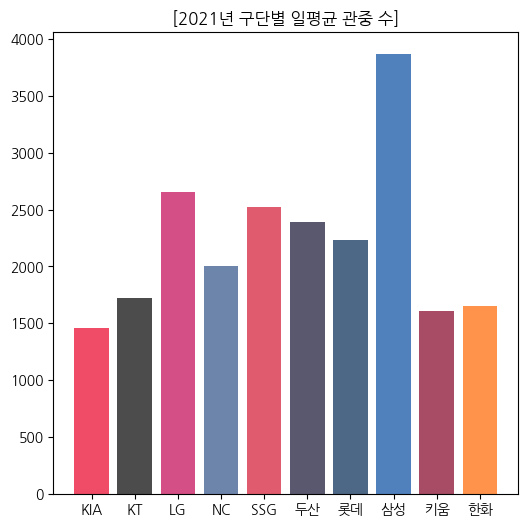

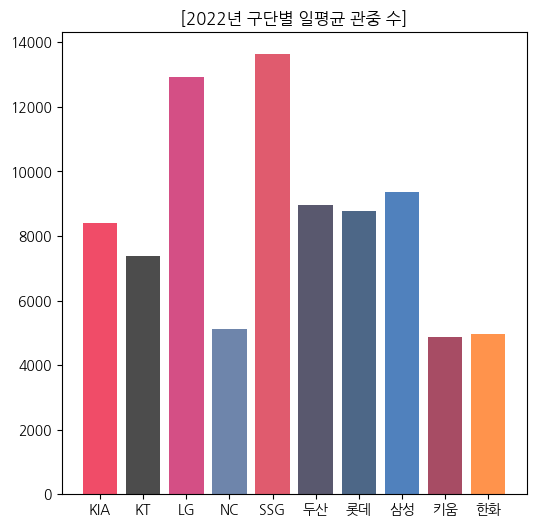

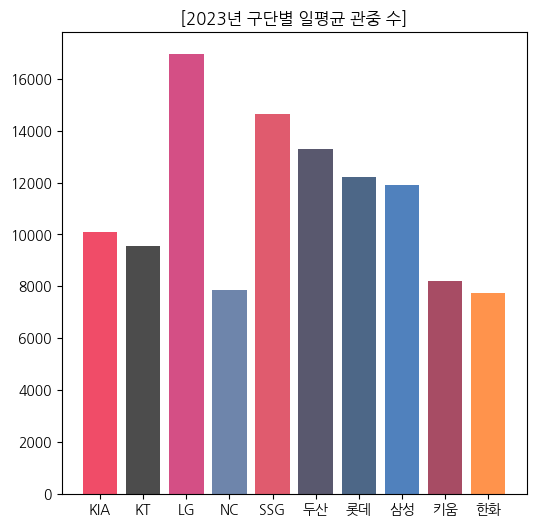

In [149]:
draw_bar(dict_2021, '[2021년 구단별 일평균 관중 수]')
draw_bar(dict_2022, '[2022년 구단별 일평균 관중 수]')
draw_bar(dict_2023, '[2023년 구단별 일평균 관중 수]')

In [10]:
#df_2023_2['구장'].value_counts()

In [11]:
#df_2023_2[df_2023_2['구장'] == '문학']

In [12]:
# stads = ['잠실', '문학', '수원', '대전', '고척', '광주', '창원', '사직', '대구', '울산', '포항']
#round(df_2021_2[df_2021_2['구장'] == '고척']['관중수'].mean())

In [34]:
dict_2021_st = {}
dict_2022_st = {}
dict_2023_st = {}

# '잠실'과 '고척'을 합쳐서 새로운 구장으로 간주하여 관중수의 합 계산(서울에 야구장이 두 개 있어서.)
stads = ['잠실/고척', '문학', '수원', '대전', '광주', '창원', '사직', '대구']
dict_2021_st['잠실/고척'] = round(df_2021_2[df_2021_2['구장'].isin(['잠실', '고척'])]['관중수'].mean())
dict_2022_st['잠실/고척'] = round(df_2022_2[df_2022_2['구장'].isin(['잠실', '고척'])]['관중수'].mean())
dict_2023_st['잠실/고척'] = round(df_2023_2[df_2023_2['구장'].isin(['잠실', '고척'])]['관중수'].mean())

for st in stads[1:] :
    dict_2021_st[st] = round(df_2021_2[df_2021_2['구장']==st]['관중수'].mean())
    dict_2022_st[st] = round(df_2022_2[df_2022_2['구장']==st]['관중수'].mean())
    dict_2023_st[st] = round(df_2023_2[df_2023_2['구장']==st]['관중수'].mean())

print('2021년 :', dict_2021_st)
print('2022년 :', dict_2022_st)
print('2023년 :', dict_2023_st)
dict_2021_values = list(dict_2021_st.values())
dict_2022_values = list(dict_2022_st.values())
dict_2023_values = list(dict_2023_st.values())

dict_keys = list(dict_2021_st.keys())

df_stads = pd.DataFrame({2021 : dict_2021_values,
                        2022 : dict_2022_values,
                        2023 : dict_2023_values}, index = dict_keys)
df_stads.to_csv('stadium.csv')
df_stads

2021년 : {'잠실/고척': 2222, '문학': 2519, '수원': 1725, '대전': 1650, '광주': 1458, '창원': 2005, '사직': 2231, '대구': 3864}
2022년 : {'잠실/고척': 8910, '문학': 13633, '수원': 7393, '대전': 4975, '광주': 8394, '창원': 5125, '사직': 8846, '대구': 9501}
2023년 : {'잠실/고척': 12818, '문학': 14633, '수원': 9553, '대전': 7764, '광주': 10099, '창원': 7854, '사직': 12652, '대구': 12446}


,2021,2022,2023
잠실/고척,2222,8910,12818
문학,2519,13633,14633
수원,1725,7393,9553
대전,1650,4975,7764
광주,1458,8394,10099
창원,2005,5125,7854
사직,2231,8846,12652
대구,3864,9501,12446


In [42]:
ppdf = pd.read_csv('행정구역_시군구_별_주민등록세대수.csv', index_col='행정구역(시군구)별')
ppdf.columns=[2021, 2022, 2023]
ppdf.columns

Index([2021, 2022, 2023], dtype='int64')

In [124]:
ppdf_selected = ppdf.loc[['서울특별시', '인천광역시', '수원시', '대전광역시', '광주광역시', '창원시', '부산광역시', '대구광역시']]
ppdf_selected.to_csv("test.csv")
ppdf_selected=ppdf_selected.astype(int)
ppdf_selected

,2021,2022,2023
행정구역(시군구)별,,,
서울특별시,4426007,4446296,4469417
인천광역시,1298647,1322632,1350912
수원시,517822,528482,537078
대전광역시,664417,673429,680261
광주광역시,645712,652355,655433
창원시,451940,456191,456830
부산광역시,1544663,1555867,1564588
대구광역시,1063893,1070873,1094148


In [92]:
X1 = ppdf_selected[2021]
Y1 = df_stads[2021]

X2 = ppdf_selected[2022]
Y2 = df_stads[2022]

X3 = ppdf_selected[2023]
Y3 = df_stads[2023]

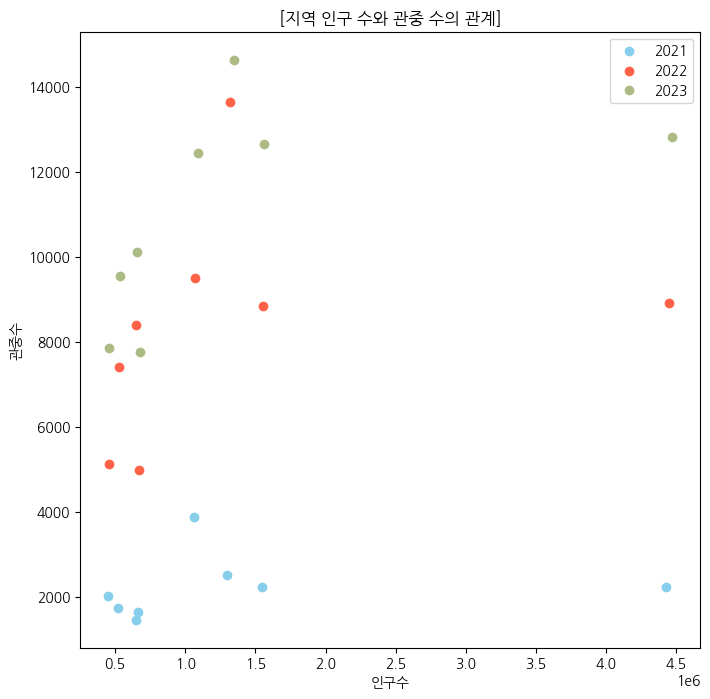

In [151]:
# 그래프
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('인구수')
ax.set_ylabel('관중수')
ax.set_title('[지역 인구 수와 관중 수 관계]')
ax.scatter(X1, Y1, color = 'skyblue', label = '2021')
ax.scatter(X2, Y2, color = 'tomato', label = '2022')
ax.scatter(X3, Y3, color = '#acbb84', label = '2023')
ax.legend(loc = 'upper right')
plt.show()

In [102]:
winning_2021 = pd.read_csv('2021_팀별_순위.csv', index_col=['순위'], usecols=['순위', '팀명', '경기', '승', '패', '무', '승률'])

In [103]:
winning_2022 = pd.read_csv('2022_팀별_순위.csv', index_col=['순위'], usecols=['순위', '팀명', '경기', '승', '패', '무', '승률'])

In [104]:
winning_2023 = pd.read_csv('2023_팀별_순위.csv', index_col=['순위'], usecols=['순위', '팀명', '경기', '승', '패', '무', '승률'])

In [111]:
winning_2021_rate = winning_2021['승률']*100
winning_2022_rate = winning_2022['승률']*100
winning_2023_rate = winning_2023['승률']*100

winning_2021_rate, winning_2022_rate, winning_2023_rate

(순위
 1     56.3
 2     52.2
 3     56.3
 4     55.4
 5     51.1
 6     50.8
 7     49.6
 8     47.8
 9     43.3
 10    37.1
 Name: 승률, dtype: float64,
 순위
 1     62.9
 2     56.3
 3     61.3
 4     56.3
 5     49.0
 6     47.5
 7     46.5
 8     45.7
 9     42.3
 10    32.4
 Name: 승률, dtype: float64,
 순위
 1     60.6
 2     56.0
 3     53.9
 4     52.8
 5     52.1
 6     51.4
 7     47.2
 8     42.7
 9     42.0
 10    41.1
 Name: 승률, dtype: float64)

In [121]:
x1 = df_teams[2021]
x2 = df_teams[2022]
x3 = df_teams[2023]

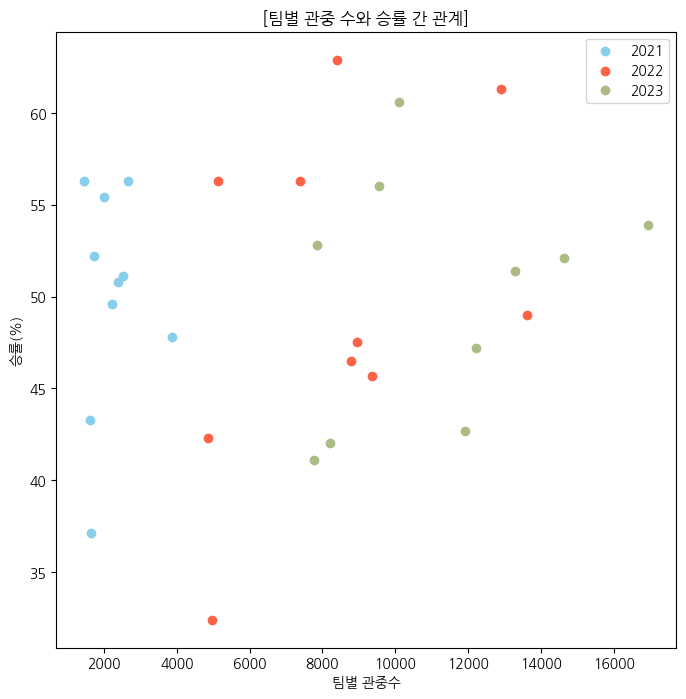

In [154]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('팀별 관중수')
ax.set_ylabel('승률(%)')
ax.set_title('[팀별 관중 수와 승률 간 관계]')
ax.scatter(x1, winning_2021_rate, color = 'skyblue', label = '2021')
ax.scatter(x2, winning_2022_rate, color = 'tomato', label = '2022')
ax.scatter(x3, winning_2023_rate, color = '#acbb84', label = '2023')
ax.legend(loc = 'upper right')
plt.show()